### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# importa el tsv y guárdalo en un dataframe

In [3]:
df = pd.read_csv("data/drugLibTrain_raw.tsv", sep="\t")
df = df.drop(df.columns[0], axis=1)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3089 non-null   object
 6   sideEffectsReview  3032 non-null   object
 7   commentsReview     3095 non-null   object
dtypes: int64(1), object(7)
memory usage: 194.3+ KB


In [5]:
df.describe(include='all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,502,NaN,5,5,1426,3031,2813,3046
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [6]:
selected_columns = ['rating', 'effectiveness', 'sideEffects']

df = df[selected_columns]

#df = pd.get_dummies(df, columns=['effectiveness', 'sideEffects'])

#print(df)

In [7]:
# comprueba los valores únicos de 'effectiveness'

In [8]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [9]:
# Creamos un diccionario para transformar esas strings en int

In [10]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [11]:
df['effectiveness_int'] = df['effectiveness'].map(my_dict)

In [12]:
# comprueba los valores únicos de 'sideEffects'

In [13]:
# crea el diccionario para sideeffects_int, como antes

In [14]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [15]:
my_dict2 = {"Mild Side Effects":0,
            "Severe Side Effects":1,
            "No Side Effects":2,
            "Extremely Severe Side Effects":3,
            "Moderate Side Effects":4}

In [16]:
df['sideeffects_int'] = df['sideEffects'].map(my_dict2)

In [17]:
df_model= df.drop(columns=["effectiveness", "sideEffects"], axis=1)
df_model

,rating,effectiveness_int,sideeffects_int
0,4,4,0
1,1,4,1
2,10,4,2
3,3,1,0
4,2,1,1
...,...,...,...
3102,10,4,0
3103,1,0,3
3104,2,1,4
3105,8,3,0


In [18]:
# guarda en una variable df_model con solo las columnas 'rating','effectiveness_int','sideEffects_int'

,rating,effectiveness_int,sideEffects_int
2202,4,4,1
3117,1,4,3
1146,10,4,0
3947,3,1,1
1951,2,1,3


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
# entrena y guarda modelos para k con valores entre 1 y 20 mediante un list comprehension usando un random_state=42
# O bueno un bucle, haz lo que te guste

In [24]:
models = []
silhouette_scores = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_model)
    score = silhouette_score(df_model, labels)
    silhouette_scores.append(score)
    
    models.append(kmeans)
    print(f"K = {k}, Silhouette Score = {silhouette_scores[-1]}")

for k, model in enumerate(models, start=1):
    print(f"Modelo para K = {k}: {model}")

best_k = np.argmax(silhouette_scores[1:]) + 2
print(f"El mejor K es {best_k} con un silhouette score de {max(filter(None, silhouette_scores))}")

K = 2, Silhouette Score = 0.5500416424832275
K = 3, Silhouette Score = 0.41743716639382644
K = 4, Silhouette Score = 0.4246714185455966
K = 5, Silhouette Score = 0.43953006580262033
K = 6, Silhouette Score = 0.43666332534334157
K = 7, Silhouette Score = 0.4371494736778905
K = 8, Silhouette Score = 0.4402523165281647
K = 9, Silhouette Score = 0.46509233729752175
K = 10, Silhouette Score = 0.4894952576252829
K = 11, Silhouette Score = 0.48873323162349613
K = 12, Silhouette Score = 0.4773079167361311
K = 13, Silhouette Score = 0.48186853331747953
K = 14, Silhouette Score = 0.5111730463879339
K = 15, Silhouette Score = 0.5286373596299778
K = 16, Silhouette Score = 0.5289755357750178
K = 17, Silhouette Score = 0.5334169597737527
K = 18, Silhouette Score = 0.5364819164935024
K = 19, Silhouette Score = 0.5475906634303441
Modelo para K = 1: KMeans(n_clusters=2, random_state=42)
Modelo para K = 2: KMeans(n_clusters=3, random_state=42)
Modelo para K = 3: KMeans(n_clusters=4, random_state=42)
Mod

In [ ]:
# muestra la lista con los modelos entrenados
# El ocho es el valor por defecto por eso no aparece cuando lo ejecutas

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42)]

In [ ]:
# guarda los silhouette scores del modelo con list comprehension

In [30]:
silhouette_scores

[0.5500416424832275,
 0.41743716639382644,
 0.4246714185455966,
 0.43953006580262033,
 0.43666332534334157,
 0.4371494736778905,
 0.4402523165281647,
 0.46509233729752175,
 0.4894952576252829,
 0.48873323162349613,
 0.4773079167361311,
 0.48186853331747953,
 0.5111730463879339,
 0.5286373596299778,
 0.5289755357750178,
 0.5334169597737527,
 0.5364819164935024,
 0.5475906634303441]

In [ ]:
# comprueba la longitud de los silhouette scores

In [31]:
len(silhouette_scores)

18

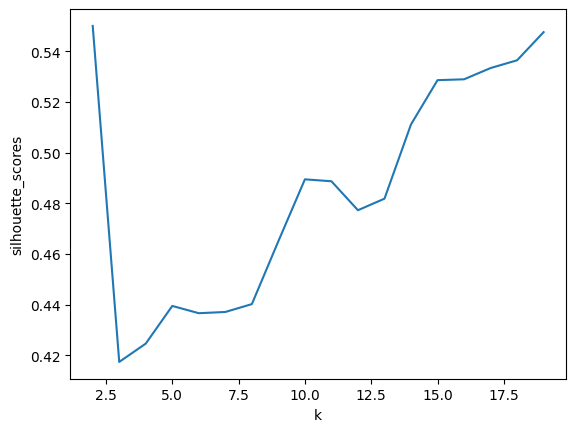

In [25]:
plt.plot(range(2,20), silhouette_scores)
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.show()

Mayor silhouette scores con K=2

In [ ]:
# guarda las inercias del model con un list comprehension

In [33]:
inercias = [model.inertia_ for model in models]
inercias 

[14837.290456597239,
 10737.041803286695,
 8371.673140137504,
 6727.142936042571,
 6074.825403335233,
 5167.604402831317,
 4423.837605491286,
 3912.6601662451308,
 3165.144855160541,
 2933.138695946837,
 2770.43536857655,
 2568.1398101651844,
 2401.1347827810287,
 2319.741311493002,
 2157.784035917096,
 1990.6419521459225,
 1945.8655767124997,
 1769.3342126040675]

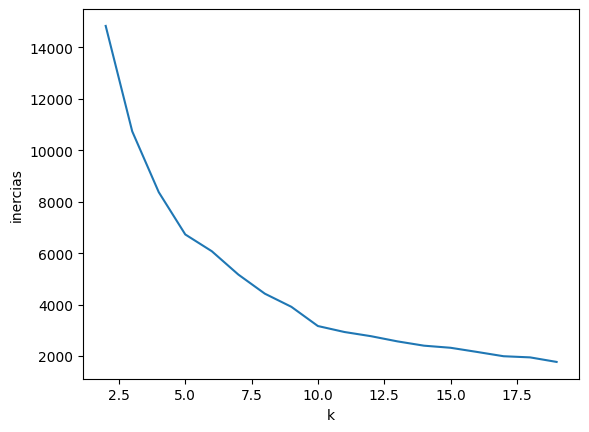

In [35]:
plt.plot(range(2,20), inercias)
plt.xlabel('k')
plt.ylabel('inercias')
plt.show()

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [ ]:
# instancia un nuevo KMeans con n_clusters=2 y random_state=42

# entrena el modelo

# comprueba los labels_

In [26]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)

kmeans_2.fit(df_model)

labels = kmeans_2.labels_
print(f"Labels del modelo KMeans con n_clusters=2: {labels}")

Labels del modelo KMeans con n_clusters=2: [0 0 1 ... 0 1 0]


#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [ ]:
# crea un dataframe .labels_ del modelo anterior

In [37]:
df_labels = pd.DataFrame(labels, columns=['Cluster'])
df_labels.head()

,Cluster
0,0
1,0
2,1
3,0
4,0


In [ ]:
# El favorito de Joselu

<Axes: ylabel='count'>

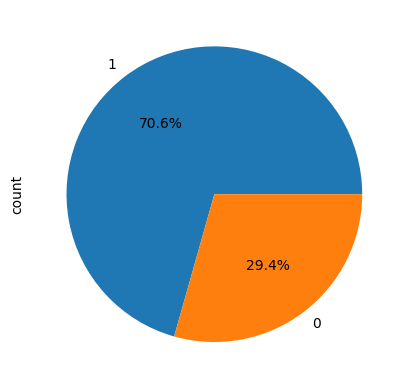

In [38]:
df_labels['Cluster'].value_counts().plot.pie(autopct="%.1f%%")